# Data preprocessing
This notebook contains the preprocessing of the dataset 1933 to 1946 and the merger of the dataset by Mona Allaert and mine.
## Data cleaning

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Loading the dataset.
df = pd.read_csv('../Materials/Dataset1933_1946.csv', sep='\t')
df.head()

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking
0,0001_Untitled document_00002-20230218_101358.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
1,0002_Untitled document_00003-20230218_101416.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
2,0003_Untitled document_00004-20230218_102224.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN
3,0004_Untitled document_00005-20230218_102247.jpg,1933-1934,Middernachtstango,9/9/1933,NaN,Dutch,Meerdere data: staan niet vermeld
4,0005_Untitled document_00006-20230218_102503.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN


In [106]:
# Loading the dataset by Mona Allaert. This was done once to add the title_language to this dataset
#df = pd.read_csv("../Materials/KVO_META.csv", encoding='Latin-1', index_col=False)
#df.head()

In [107]:
# Number of rows
num_rows = df.shape[0]
print("Number of rows in df:", num_rows)

Number of rows in df: 6207


In [108]:
#Delete trailing and leading whitespaces.
df['Image'] = df['Image'].str.strip() 
df['Collection'] = df['Collection'].str.strip() 
df['Production'] = df['Production'].str.strip() 
df['Occasion'] = df['Occasion'].str.strip() 

In [109]:
#New boolean column, which indicates whether the performance was part of a multiple bill (True) or not (False).

multiple_bills = []
for row in df['Production']:
    if '+' in str(row):
        multiple_bills.append(True)
    else:
        multiple_bills.append(False)


df['Multiple bill'] = multiple_bills
df['Multiple bill'].value_counts()

False    5937
True      270
Name: Multiple bill, dtype: int64

In [110]:
#New column with a random ID voor each performance.

import random
df['Performances_ID'] = random.sample(range(100000, 999999), df.shape[0])

In [111]:
# Cells that include a '+' , i.e. a multiple bill are split so that each row only contains one work.
# Through the Performance_ID we can keep track of those performances that were performed as a multiple bill.

df = df.assign(Production=df.Production.str.split("+")).explode('Production')
df = df.reset_index(drop=True)
df.sample(5)

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking,Multiple bill,Performances_ID
4848,0460_1942-1943_00460-20230306_133835.jpg,1942-1943,NaN,NaN,NaN,Dutch,NaN,False,166290
2781,1939-1940_00165-20230303_110433.jpg,1939-1940,NaN,NaN,NaN,Dutch,NaN,False,270558
143,0141_1933-1934_00142-20230218_112545.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,134464
92,0093_Untitled document_00094-20230218_105329.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,469150
1573,1937-1938_00217-20230218_164905.jpg,1937-1938,NaN,NaN,NaN,Dutch,NaN,False,740683


## Normalise spelling

In [112]:
VariatieC = {
"Het Minnebrugje" : "'t Minnebrugje T' Minnebrugje Het Minnebrugsken Het minnebrugje Minnebrugje",
"Het Arendsnest" : "Arendsnest",
"Bohème" : "Boheme Die Bohème Die Boheme",
"De Bruid der Zee" : "Bruid der Zee",
"Het Kind" : "Das Kind",
"Czaar en Timmerman" : "Csaar en Timmerman Zar und Zimmermann",
"De Verzonken Klok" : "De Verzonkene Klok",
"De Bedelstudent" : "De Arme student",
"Suite n°7" : "Suite 7",
"De Doode Oogen" : "De Dode Ogen",
"De Doode Stad" : "De Dode Stad",
"De Koningin van Saba" : "De Koningin van Saaba",
"De Lustige Boer" : "De Lustige Broeder Lustige Boer",
"De Lustige Oorlog" : "De Vrolijke Oorlog",
"De Lustige Vrouwtjes van Windsor" : "The Merry Wives of Windsor De Vrolijke Vrouwtjes van Windsor Lustige Vrouwtjes van Windsor",
"De Meesterzangers van Nurenberg" : "Die Meistersinger von Nürnberg Die Meistersing von Nürnberg De Meesterzangers van Neurenberg De Meesterzanger De Meesterzangers De Meesterzangers van Nuremberg De Meesterzangers van Nürnberg", 
"De Tooverfluit" : "Tooverfluit Tooverfluit Die Zauberflöte",
"De Tragedie van Salomé" : "De tragedie van Salomé Salome",
"De Twee Medaillons" : "De Tweede Medaillons",
"De Vestale" : "Vestale",
"De Vrijschutter" : "Vrijschutter Der Freischütz",
"De Walkure" : "De Walküre La Walkyrie Die Walkure Die Walküre Die Walkuere",
"De Zeven Hoofdzonden" : "de Zeven Hoofdzonden",
"De Drie Houten Poppen" : "De drie Houten Poppen",
"De Evangelieman" : "Die Evangelieman",
"Don Juan" : "Don Giovanni",
"Vier Canzoni" : "4 canzoni",
"De Draaimolen" : "Draaimolen",
"Driemeisjeshuis" : "Het Driemeisjeshuis",
"Een Nacht te Grenada" : "Eeen Nacht te Grenada",
"Ein Walzertraum" : "Walzertaum Walsdroom",
"Hansje en Grietje" : "Hans en Grietje",
"Herbergprinses" : "Herbergrprinses Herberprinses",
"Het Rijngoud" : "Rijngoud Rheingold",
"Het Rozemarijntje" : "Rosemarijntje Rozemarijntje",
"Winternachtsdroom" : "Het Winternachtsdroom",
"Zeevolk" : "Het Zeevolk",
"Hoffmann's Vertellingen" : "Hoffmann's Vertellingenen",
"Jean-Marie" : "Jose Maria Jean Marie Marie José",
"Jozef in Egypte" : "Josef in Egypte",
"De Kinderen der Zee": "Kinderen der Zee",
"Liefdetoover" : "Liefde Toover",
"Marieke van Nijmegem" : "Marieke van Nymwegen Marieke van Nijmegen Marike van Nymegem",
"Orpheus' Dood" : "Orpheus's Dood",
"Paljas" : "Pagliacci Der Bajazzo",
"Parisina" : 'Parsina',
"Quinten Massijs" : "Quinten Massys Quinten Metsys Quinten-Massijs Quinten-Massys",
"Reeks van Oud-Grieksche Dansen" : "Reeks van Oud-Griekscge Dansen",
"Reinaert de Vos" : "Reinart de Vos Reinaert de vos",
"De Rijndwergen": "Rijndwergen",
"Tannhauser" : "Tannhäuser",
"Theroigne de Mericout" : "Theroigne De Mericourt Theroigne de Mericoux Théroigne de Méricourt Théroigne de Méricout",
"Toespraak van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn" : "Toespraal van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn",
"Tweede Dansenreeks" : "Tweede dansreeks",
"Tristan en Isolde" : "Tristan und Isolde",
"Faust" : "Faust (Margarethe)",
"Francesca" : "Francesca (De Bloeiende Weg)",
"Traviata" : "La Traviata",
"Het Land van den Glimlach" : "Das Land des Lächelns",
"De Rozenkavalier" : "Der Rosenkavalier",
"De Vledermuis" : "Die Fledermaus",
"De Vliegende Hollander" : "Der fliegende Holländer",
"Mächte des Lebens": "Levensmachten",
"Der Heiratsspiegel" : "De Spiegel van het Huwelijk",
"Lakme" : "Lakmé",
"Boris Godounow" : "Boris Godouwnow",
"De Glasblazer" : "Der Glasbläser",
"Paris in Verlegenheid" : "\"Paris\" in Verlegenheid", 
"Iphigénie en Tauride" : "Iphigeneia in Tauris",
"Aïda" : "Aida",
"Rhapsodie N. 2" : "Rhapsodie Nr 2 2e Rhapsodie",
"André Chénier" : "Andre Chenier Andrea Chenier",
"Götterdämmerung" : "Godendeemstering",
"Prinses Zonneschijn" : "Prinzessin Sonnenschein",
"Ariane en Blauwbaard" : "Ariane et Barbe Bleue Ariane et Barbe-Bleue",
"De Parelvisschers" : "Die Perlenfischer",
"De Zigeunerbaron" : "Der Zigeunerbaron",
"De Graaf van Luxemburg" : "Der Graf von Luxemburg",
"Elsje Zevenschoon" : "Elschen Siebenschön",
"Romeo en Julia" : "Romeo und Julia",
"De Lustige Weduwe" : "Die Lustige Witwe",
"De Barbier van Sevilla" : "Der Barbier von Sevilla",
"Het Meisje van Zaventem" : "Das Mädchen von Zaventem",
"Zwaanhild" : "Schwanhild",
"De Vogelhandelaar" : "Der Vogelhändler",
"Dansvertooning II" : "Tanzvorstellung II",
"Visioen" : "Vision",
"Frederika" : "Friederike",
"Figaro’s Bruiloft" : "Le Nozze di Figaro Figaros Hochzeit",
"De Ontvoering uit het Serail" : "Die Entführung aus dem Serail",
"Zwaargewicht" : "Zwaargewicht ( of De eer van't Land)"
}

In [113]:
#create functions that iterates over the items in the dictionary and returns the key if the title is in the values.
#if it is not in the values, there was not spelling variation for this title and the title is returned.
def clean_titles (row):

    for key, values in VariatieC.items():
        if str(row) in str(values):
            #print('it is in the values')
            return key
        elif row == key:
            return key
    else:
        return row   

In [114]:
#Test it on some variations.

a = "Hoffman's Vertellingen"
b = "Tannhäuser"
c = 'Madame Butterfly'

print(clean_titles(a))
print(clean_titles(b))
print(clean_titles(c))

Hoffman's Vertellingen
Tannhauser
Madame Butterfly


In [115]:
#Function is now applied to the entire dataset. The normalised spelling is gathered in a new column called 'Normalised title'.
df['Normalised title'] = df['Production'].apply(clean_titles)

In [116]:
df.head()

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking,Multiple bill,Performances_ID,Normalised title
0,0001_Untitled document_00002-20230218_101358.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,238044,NaN
1,0002_Untitled document_00003-20230218_101416.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,641880,NaN
2,0003_Untitled document_00004-20230218_102224.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,431885,NaN
3,0004_Untitled document_00005-20230218_102247.jpg,1933-1934,Middernachtstango,9/9/1933,NaN,Dutch,Meerdere data: staan niet vermeld,False,912252,Middernachtstango
4,0005_Untitled document_00006-20230218_102503.jpg,1933-1934,NaN,NaN,NaN,NaN,NaN,False,914202,NaN


In [117]:
#delete all leading and trailing whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

## Add metadata

Load dictionary-formatted txt-file containing additional metadata.
- key = normalised title
- value [0] = original title
- value [1] = composer
- value [2] = year of first performance
- value [3] = original title
- value [4] = genre (not used in the thesis)
- value [5] = language of the title


In [118]:
#load the metadata
with open('../Materials/META2.txt','r', encoding = 'UTF8') as inf:
    Metadata = eval(inf.read())

In [119]:
#Check if the txt-file is formatted correctly
output = []
for key, values in Metadata.items():
    if len(values) != 6: #Changed this to 6
       output.append(values)
       print(output)

if len(output) == 0:
    print('Looking good!')

Looking good!


In [120]:
#Define a function that identifies the original language based on the metadata.

def add_taal (row):
    for key, values in Metadata.items():
        if row == key:
            return values[0]
    else:
        return 'N/A'

#try it out.

a = "Madame Butterfly"
b = "Tannhauser"
c = "Quinten Massijs"

print(add_taal(a))
print(add_taal(b))
print(add_taal(c))

ITA
DUI
NL


In [121]:
#Define a function that identifies the composer based on the metadata.

def add_composer (row):
    for key, values in Metadata.items():
        if row == key:
            return values[1]
    else:
        return 'N/A'
    
#try it out.

print(add_composer(a))
print(add_composer(b))
print(add_composer(c))

Giacomo Puccini
Richard Wagner
Emile Wambach


In [122]:
#Define a function that identifies the year of the first performance based on the metadata.

def add_premiere (row):
    for key, values in Metadata.items():
        if row == key:
            return values[2]
    else:
        return 'N/A'

print(add_premiere(a))
print(add_premiere(b))
print(add_premiere(c))

1904
1845
1899


In [123]:
#Define a function that identifies the year of the original title based on the metadata.

def add_oortitel (row):
    for key, values in Metadata.items():
        if row == key:
            return values[3]
    else:
        return 'N/A'


print(add_oortitel(a))
print(add_oortitel(b))
print(add_oortitel(c))

Madama Butterfly
Tannhäuser
Quinten Massys


In [124]:
#Define a function that identifies the year of the genre based on the metadata.

def add_genre (row):
    for key, values in Metadata.items():
        if row == key:
            return values[4].lower()
    else:
        return 'N/A'


print(add_genre(a))
print(add_genre(b))
print(add_genre(c))

opera seria
romantische oper
lyrisch drama


In [125]:
#Define a function that identifies the language of the title on the leaflet based on the metadata.

def add_title_taal (row):
    for key, values in Metadata.items():
        if row == key:
            return values[5]
    else:
        return 'N/A'

#try it out.

a = "Vlammend Land"
b = "Tannhauser"
c = "Der Dorfbarbier"

print(add_title_taal(a))
print(add_title_taal(b))
print(add_title_taal(c))

NL
Unk
DUI


In [126]:
#add the metadata as new columns in the dataframe.

df['Original language'] = df['Normalised title'].apply(add_taal)
df['Composer'] = df['Normalised title'].apply(add_composer)
df['Original premiere'] = df['Normalised title'].apply(add_premiere)
df['Original title'] = df['Normalised title'].apply(add_oortitel)
df['genre'] = df['Normalised title'].apply(add_genre)
df['Title_Language'] = df['Normalised title'].apply(add_title_taal)

df.sample(5)

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Title_Language
406,1934-1935_00080-20230218_124438.jpg,1934-1935,NaN,NaN,NaN,NaN,NaN,False,776073,NaN,N/A,N/A,N/A,N/A,N/A,N/A
6319,0286_1945-1946_00286-20230310_125215.jpg,1945/1946,NaN,NaN,NaN,Dutch,NaN,False,972807,NaN,N/A,N/A,N/A,N/A,N/A,N/A
5603,0390_1943-1944_00390-20230306_162758.jpg,1943/1944,Pavane,14/4/1944,Wehrmachsvorstellung,German,NaN,True,510869,Pavane,FR,Gabriel Fauré,1887,Pavane,orchestra,Unk
3257,0005_1940-1941 deel 2_00005-20230303_131500.jpg,1940-1941,NaN,NaN,NaN,Dutch,NaN,False,373710,NaN,N/A,N/A,N/A,N/A,N/A,N/A
4370,0019_1942-1943_00019-20230306_122116.jpg,1942-1943,NaN,NaN,NaN,Dutch,NaN,False,722733,NaN,N/A,N/A,N/A,N/A,N/A,N/A


## Additional preprocessing

In [127]:
#Convert the Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [128]:
df.head()

,Image,Collection,Production,Date,Occasion,Leaflet_Language,Opmerking,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Title_Language
0,0001_Untitled document_00002-20230218_101358.jpg,1933-1934,NaN,NaT,NaN,NaN,NaN,False,238044,NaN,N/A,N/A,N/A,N/A,N/A,N/A
1,0002_Untitled document_00003-20230218_101416.jpg,1933-1934,NaN,NaT,NaN,NaN,NaN,False,641880,NaN,N/A,N/A,N/A,N/A,N/A,N/A
2,0003_Untitled document_00004-20230218_102224.jpg,1933-1934,NaN,NaT,NaN,NaN,NaN,False,431885,NaN,N/A,N/A,N/A,N/A,N/A,N/A
3,0004_Untitled document_00005-20230218_102247.jpg,1933-1934,Middernachtstango,1933-09-09,NaN,Dutch,Meerdere data: staan niet vermeld,False,912252,Middernachtstango,DUI,Károly Komjáti,?,Tango um Mitternacht,operette,NL
4,0005_Untitled document_00006-20230218_102503.jpg,1933-1934,NaN,NaT,NaN,NaN,NaN,False,914202,NaN,N/A,N/A,N/A,N/A,N/A,N/A


In [129]:
# Obtain the season. An operatic season runs (approximately) from September to May
def get_season(date):
    year = date.year
    if date.month >= 9:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"


df['Season'] = df['Date'].apply(get_season)

In [130]:
#Remove irrelevant pages, i.e. pages where both the production and the date of performance are missing

old_len = len(df)
df2 = df.dropna(subset=['Production','Date'])
print(f'{old_len - len(df2)} of {old_len} records removed')

3612 of 6551 records removed


In [131]:
#Remove duplicate, i.e. cases in which the production and date are the same.

all_dups = len(df2)
df2 = df2.drop_duplicates(subset=['Production', 'Date'])
print(f'{all_dups - len(df2)} of {all_dups} records removed! {len(df2)} records remain')

450 of 2939 records removed! 2489 records remain


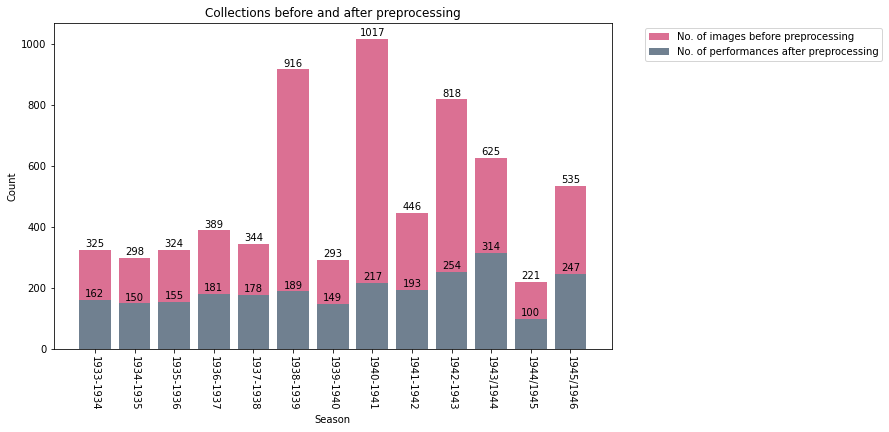

In [132]:
# make a visualization
fig, ax = plt.subplots(figsize=(10, 6))

counts1 = df['Collection'].value_counts()[df2['Collection'].unique()].sort_index()
counts2 = df2['Collection'].value_counts().sort_index()

counts2 = counts2.sort_index()
x2 = counts2.index
y2 = counts2.values

counts1 = counts1.sort_index()

# Generate x and y data for the bar plot
x = counts1.index
y = counts1.values

# Plotting
bars1 = ax.bar(x, y, color='palevioletred', label='No. of images before preprocessing')
bars2 = ax.bar(x2, y2, color='slategrey', label='No. of performances after preprocessing')

# Adding counts in the bars
for bar, count in zip(bars1, y):
    height = bar.get_height()
    ax.annotate(f'{count}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

for bar, count in zip(bars2, y2):
    height = bar.get_height()
    ax.annotate(f'{count}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

# Adding ticks and labels to the x-axis
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Collections before and after preprocessing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [133]:
#Save the new datasets
#df2.to_csv('../Materials/KVO_META_Cleaned.csv', encoding = 'utf-8')
#df2.to_csv('../Materials/Cleaned_Dataset.csv', encoding = 'utf-8')

# Merge the two dataset

In [144]:
# Load the cleaned dataset by Mona Allaert
df_1893_1934 = pd.read_csv("../Materials/KVO_META_Cleaned.csv", encoding='utf-8', index_col=False)
df_1893_1934.head()

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language
0,0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,268522,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL
1,1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,557880,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk
2,2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,341468,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL
3,3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,992196,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk
4,4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,667111,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk


In [145]:
df_1893_1934.shape

(4441, 17)

In [146]:
# Remove Collection 1933-1934, because this is also present in the other dataset
df_1893_1934 = df_1893_1934[df_1893_1934['Collection'] != '1933-1934']
df_1893_1934.shape

(4278, 17)

In [147]:
#df2 is cleaned dataset 1933-1946
df2.shape

(2489, 17)

In [148]:
# Merging the datasets
df = pd.concat([df_1893_1934, df2], ignore_index=True)
df.head()

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language,Leaflet_Language,Opmerking
0,0.0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,268522,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
1,1.0,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,557880,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
2,2.0,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,341468,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
3,3.0,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,992196,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
4,4.0,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,667111,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN


In [151]:
df.shape

(6767, 18)

In [152]:
#remove all trailing and leading whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [153]:
#convert the date column to datetime.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [143]:
# Save the merged DataFrame
#df.to_csv('../Materials/Merged_Dataset.csv', encoding = 'utf-8')